# Feature reduction and extraction


In this notebook we will extract features using deep learning method called Convultional autoencoder.

The input and the output to this method will be the galaxy images

---

let us call the data from the prevoius notebook

In [41]:
%store -r images_trainPre

In [42]:
images_trainPre.shape

torch.Size([8000, 1, 56, 56])

In [43]:
images_trainPre = images_trainPre.reshape(8000,56,56)

---

In [44]:
import tensorflow as tf
from source.galaxyencode import GalaxyEncoder

In [45]:
model = GalaxyEncoder()

In [46]:
model.compile(optimizer='sgd', loss='mse')


In [47]:
model.build((None, 56,56,1))
model.summary()

Model: "galaxy_encoder_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 1568)              1320      
                                                                 
 sequential_9 (Sequential)   (None, 56, 56, 1)         225       
                                                                 
Total params: 1,545
Trainable params: 1,545
Non-trainable params: 0
_________________________________________________________________


In [48]:
import time

In [49]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)
print(images_trainPre.shape)

(60000, 28, 28)
(10000, 28, 28)
torch.Size([8000, 56, 56])


In [50]:
import numpy as np

In [51]:
start = time.time()
print('Start Time: ', start)
model.fit(
    np.array(images_trainPre), np.array(images_trainPre),
    shuffle=True,
    batch_size=264,

    # validation_data= (images_trainPre, images_trainPre),
    epochs=30,
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir="/users/hussein/work/galaxy-cluster/logs")]
)

Start Time:  1664451696.0682857
Epoch 1/30
31/31 [==============================] - 13s 396ms/step - loss: 1401.0619
Epoch 2/30
31/31 [==============================] - 13s 428ms/step - loss: 1400.1863
Epoch 3/30
31/31 [==============================] - 13s 410ms/step - loss: 1400.1863
Epoch 4/30
31/31 [==============================] - 13s 405ms/step - loss: 1400.1862
Epoch 5/30
31/31 [==============================] - 13s 416ms/step - loss: 1400.1860
Epoch 6/30
31/31 [==============================] - 14s 437ms/step - loss: 1400.1863
Epoch 7/30
31/31 [==============================] - 13s 412ms/step - loss: 1400.1859
Epoch 8/30
31/31 [==============================] - 13s 417ms/step - loss: 1400.1860
Epoch 9/30
31/31 [==============================] - 13s 414ms/step - loss: 1400.1864
Epoch 10/30
31/31 [==============================] - 12s 401ms/step - loss: 1400.1863
Epoch 11/30
31/31 [==============================] - 12s 401ms/step - loss: 1400.1859
Epoch 12/30
31/31 [============

In [52]:
import matplotlib.pyplot as plt


In [53]:
test = np.array(images_trainPre)
output = model.predict(test)

250/250 [==============================] - 7s 29ms/step


In [56]:
encoded_imgs = model.encoder(np.array(images_trainPre)).numpy()
decoded_imgs = model.decoder(encoded_imgs).numpy()

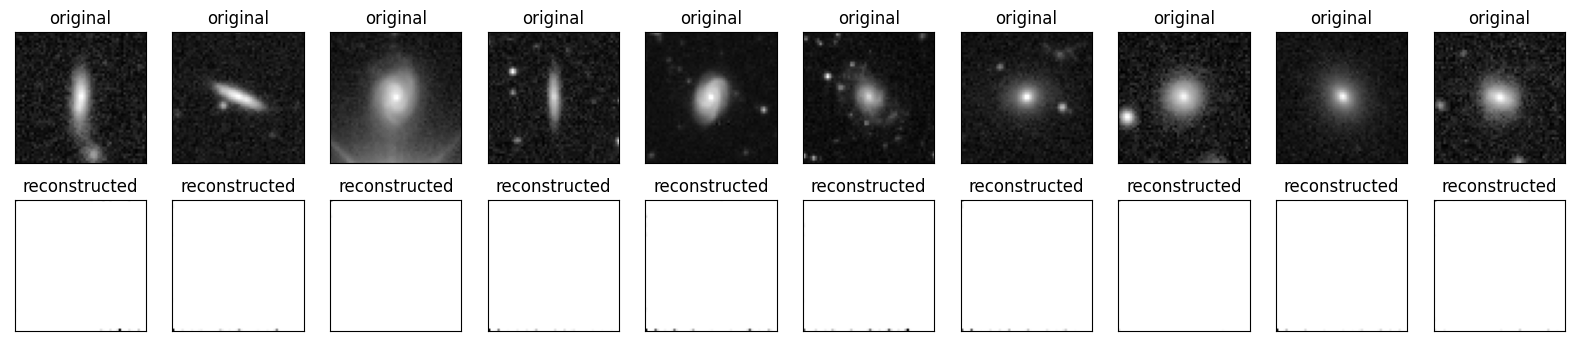

In [57]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(np.array(images_trainPre)[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()